In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
dataset=pd.read_csv("CO2_emission.csv")
dataset.head(10)

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
5,2021,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,11.3,8.1,9.8,231,7
6,2021,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,10.0,7.2,8.7,205,3
7,2021,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,10.5,7.7,9.2,217,3
8,2021,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,13.5,9.3,11.6,271,3
9,2021,Alfa Romeo,Stelvio,SUV: Small,2.0,4,A8,10.3,8.1,9.3,218,3


In [4]:
newdata = dataset.select_dtypes(include=['float64'])
newdata

,Engine_Size,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km)
0,2.4,9.9,7.0,8.6
1,3.5,11.1,10.8,11.0
2,2.0,11.0,8.6,9.9
3,2.0,11.3,9.1,10.3
4,2.0,11.2,8.0,9.8
...,...,...,...,...
930,2.0,10.7,7.7,9.4
931,2.0,11.1,8.3,9.9
932,2.0,11.7,8.6,10.3
933,2.0,11.5,8.4,10.1


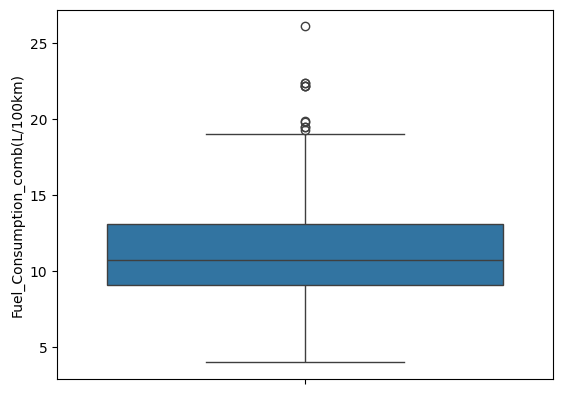

In [5]:
sns.boxplot(dataset['Fuel_Consumption_comb(L/100km)'])
plt.show()

In [28]:
Q1 = dataset['Fuel_Consumption_comb(L/100km)'].quantile(0.25)
Q3 = dataset['Fuel_Consumption_comb(L/100km)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = dataset[(dataset['Fuel_Consumption_comb(L/100km)'] < lower_bound) | (dataset['Fuel_Consumption_comb(L/100km)'] > upper_bound)]
outliers.index

Index([123, 124, 200, 345, 347, 393, 548, 549, 550, 551, 825], dtype='int64')

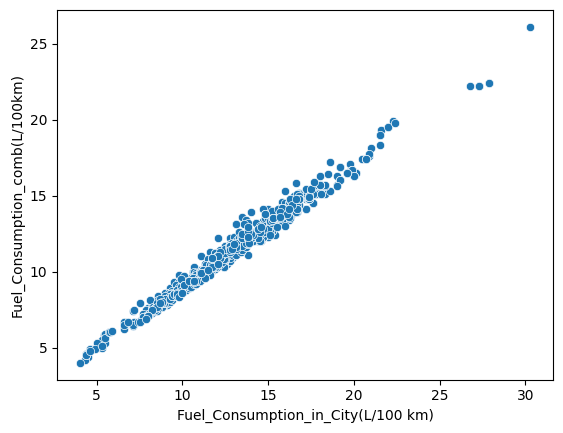

In [8]:
sns.scatterplot(x=dataset["Fuel_Consumption_in_City(L/100 km)"], y=dataset["Fuel_Consumption_comb(L/100km)"])
plt.show()

In [10]:

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
x = dataset.iloc[:, :-1]
y = dataset["Fuel_Consumption_comb(L/100km)"]
lr = LinearRegression()
sfs = SFS(lr, k_features=2, forward=True)
sfs = sfs.fit(x, y)
selected_features = sfs.k_feature_names_
print("Selected features:", selected_features)
sfs.k_score_

Selected features: ('Fuel_Consumption_in_City(L/100 km)', 'Fuel_Consumption_in_City_Hwy(L/100 km)')


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\HP\AppD

0.9997486418424477

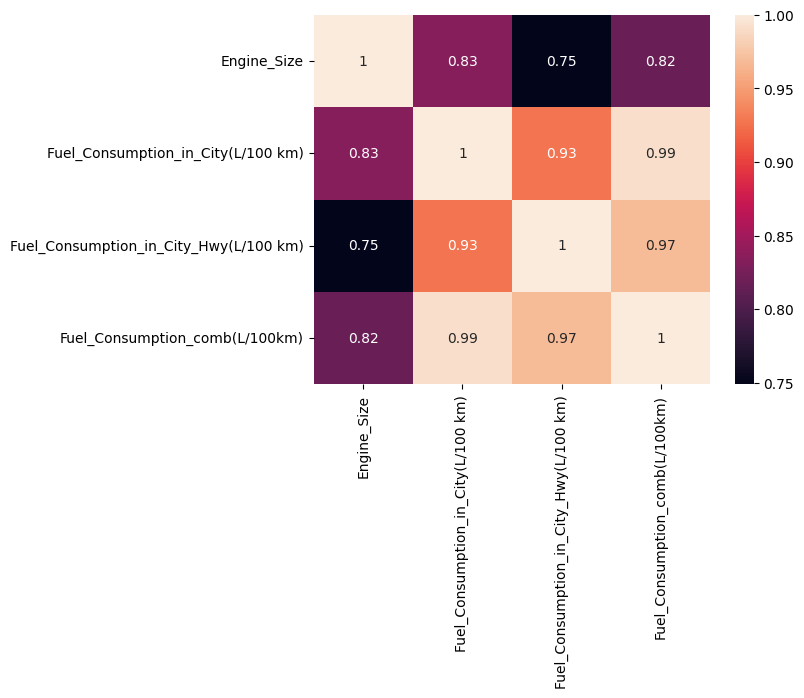

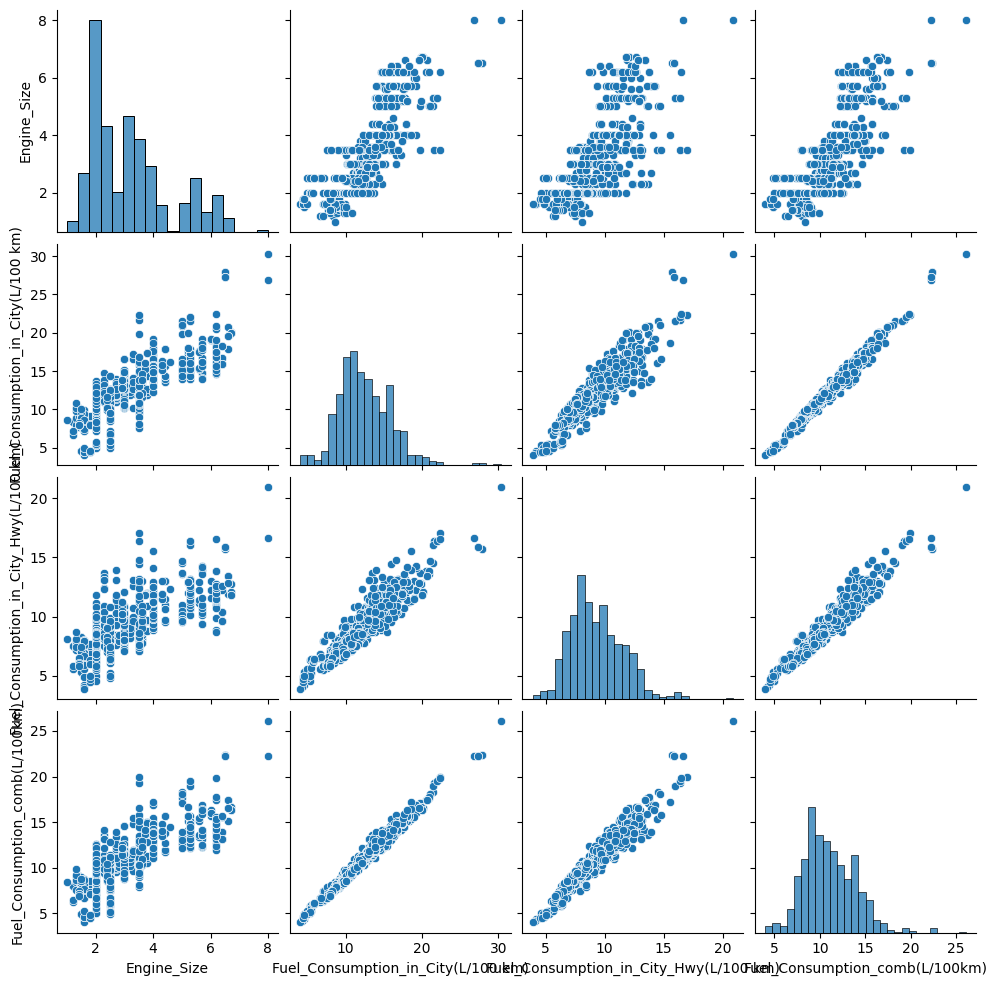

LinearRegression()

In [32]:
sns.heatmap(data=newdata.corr(),annot=True)
plt.show()
sns.pairplot(data=newdata)
plt.show()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

In [35]:
LR.predict(x_test)

array([13.17494683,  9.6236931 , 13.03040986, 22.41104436,  8.80306241,
       13.74839816,  4.98027792,  9.23703768,  4.62089675,  9.42305955,
        8.8639484 , 12.31005033, 13.86011848,  8.7923576 ,  9.37844181,
       10.77261505,  9.11854913, 10.2770008 , 11.86399383, 10.59702648,
       13.97961047,  9.7589017 , 10.10424388,  9.293565  ,  9.31704464,
       10.84919661,  9.41731581,  8.30711726, 13.70723552, 15.55171167,
       11.85313843, 13.74431099, 14.04689334, 11.52391391, 14.49082043,
        9.17357048, 12.79316126, 10.10950614,  8.80306241, 13.80868177,
       12.2973964 , 10.42396837,  6.68651249,  5.35998483, 11.71850253,
       12.17963115,  8.94822282, 12.02892833,  7.60723407, 15.28211763,
       10.48921305, 14.82287661,  9.0483137 , 11.73930975,  8.80832466,
        5.80072833,  4.91136818,  9.07438318, 11.37784991, 10.01392453,
        9.12097973,  6.70623584,  9.24380591,  9.01845825,  9.95802929,
       16.30634471,  8.16331222, 15.29212019, 11.00881811,  7.58

In [36]:
sns.scatterplot(x=x, y=y)
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (935, 3) instead